### Some clarifications

- In statistics, the logistic model (or logit model) is a widely used statistical model that, in its basic form, uses a [logistic function](https://en.wikipedia.org/wiki/Logistic_function) to model a binary dependent variable; many more complex [extensions](https://en.wikipedia.org/wiki/Logistic_regression#Extensions) exist;


- In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model; it is a form of binomial regression. Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail, win/lose, alive/dead or healthy/sick; these are represented by an indicator variable, where the two values are labeled "0" and "1";


- In the logistic model, the [log-odds](https://en.wikipedia.org/wiki/Log-odds) (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name;


- The [unit of measurement](https://en.wikipedia.org/wiki/Unit_of_measurement) for the log-odds scale is called a [logit](https://en.wikipedia.org/wiki/Logit), from **log**istic un**it**, hence the alternative names;


- Analogous models with a different sigmoid function instead of the logistic function can also be used, such as the [probit model](https://en.wikipedia.org/wiki/Probit_model); the defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, with each dependent variable having its own parameter; for a binary independent variable this generalizes the [odds ratio](https://en.wikipedia.org/wiki/Odds_ratio);


- Logistic regression was developed by statistician David Cox in 1958. The binary logistic regression model has [extensions](https://en.wikipedia.org/wiki/Logistic_regression#Extensions) to more than two levels of the dependent variable: categorical outputs with more than two values are modelled by [multinomial logistic regression](https://en.wikipedia.org/wiki/Multinomial_logistic_regression), and if the multiple categories are [ordered](https://en.wikipedia.org/wiki/Level_of_measurement#Ordinal_type), by [ordinal logistic regression](https://en.wikipedia.org/wiki/Ordinal_logistic_regression), for example the proportional odds ordinal logistic model. The model itself simply models probability of output in terms of input, and does not perform [statistical classification](https://en.wikipedia.org/wiki/Statistical_classification) (it is not a classifier), though it can be used to make a classifier, for instance by choosing a cutoff value and classifying inputs with probability greater than the cutoff as one class, below the cutoff as the other; this is a common way to make a binary classifier. The coefficients are generally not computed by a closed-form expression, unlike [linear least squares](https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)); see [§ Model fitting](https://en.wikipedia.org/wiki/Logistic_regression#Model_fitting);

✅ Find more details about 'log-it' and 'odds' from [this separate topic]().

### Modeling

Lets look back the [linear regression](https://lnshi.github.io/ml-exercises/jupyter_notebooks_in_html/rdm001_multivariable_linear_regression_gradient_descent/multivariable_linear_regression_gradient_descent.html#Define-the-latest-squares-cost-function) a bit, for linear regression its [link function](https://en.wikipedia.org/wiki/Generalized_linear_model#Link_function) is a multivariate linear equation:

$$
z_\theta(x_1, x_2, \dots, x_m) = \theta_0 + \theta_1x_1 + \dots + \theta_mx_m \
= \theta \
\begin{pmatrix}
  1 & x_1 & x_2 & \dots & x_m
\end{pmatrix} , \, \
\theta = \
\begin{pmatrix}
  \theta_0 \\
  \theta_1 \\
  \vdots \\
  \theta_m
\end{pmatrix}
$$

for logistic regression it is a [generalized linear model (GLM)](https://en.wikipedia.org/wiki/Generalized_linear_model) also, and its [link function](https://en.wikipedia.org/wiki/Generalized_linear_model#Link_function) is [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function): $y = \frac{1}{1 + e^{-x}}$, then we can define the model for logistic regression:

$$
h_\theta(x) = h_\theta(x_1, x_2, \dots, x_m) = \frac{1}{1 + e^{-\theta \begin{pmatrix} 1 & x_1 & x_2 & \dots & x_m \end{pmatrix}}} \
, \, \
\theta = \
\begin{pmatrix}
  \theta_0 \\
  \theta_1 \\
  \vdots \\
  \theta_m
\end{pmatrix}
$$

✅ Find more details about why the link function for linear regression is 'a multivariate linear equation', and for logistic is sigmoid function from [this separate topic]().

#### Lets see what does the sigmoid function do

- Lets draw the sigmoid function

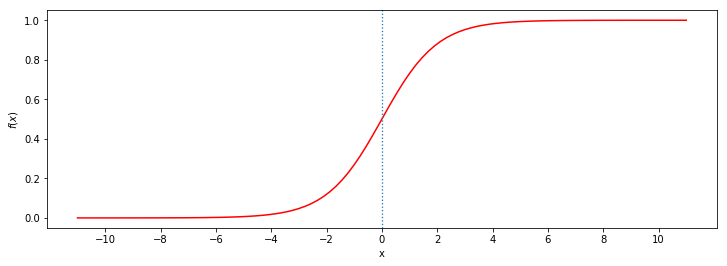

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return 1 / (1 + np.power(np.e, -x))

x = np.linspace(-11., 11., num=100, endpoint=True,)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, f(x), 'r')
ax.set_xticks(np.linspace(-10., 10., num=11, endpoint=True), minor=False)
ax.set_xlabel('x')
ax.set_ylabel('$f(x)$')

vline = ax.axvline(x=0.)
vline.set_linestyle('dotted')
vline.set_linewidth(1.3)

- Analysis

  * The domain of the sigmoid function is: $(-\infty, +\infty)$, and the range is: $(0, 1)$;
  * So the range of the above function: $h_\theta(x)$ is also $(0, 1)$;
  * Then the value of the above function: $h_\theta(x)$ can represent some kind of probability, like:
    - If $h_\theta(x) < 0.5$ then the sample $x$ belongs to class A;
    - If $h_\theta(x) > 0.5$ then the sample $x$ belongs to calss B;
    - So we can treat the sigmoid function as the [PDF (probability density function)](https://lnshi.github.io/ml-exercises/jupyter_notebooks_in_html/rdm005_PDF_PMF_CDF/PDF_PMF_CDF.html#PDF-(probability-density-function)) of the ALL sample dataset X;

#### How to estimate the $\theta$: [MLE (Maximum Likelihood Estimation)](https://lnshi.github.io/ml-exercises/jupyter_notebooks_in_html/rdm006_Bayes%E2%80%99%20Theorem_and_MLE_MAP/Bayes%E2%80%99%20Theorem_and_MLE_MAP.html)

- We can see the value of the above function: $h_\theta(x)$ represents the probability of that $h_\theta(x) = 1$, so to input $x$, the probability of $h_\theta(x) = 1$ or $h_\theta(x) = 0$ is:
  * $h_\theta(x) = 1$ (belongs to class 1): $P(Y=1|x; \theta) = h_\theta(x)$;
  * $h_\theta(x) = 0$ (belongs to class 0): $P(Y=0|x; \theta) = 1 - h_\theta(x)$;
  * That is: discrete variable $Y$ ($x$ belongs to class 0 or 1) subjects to [bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution), then we can get its [PMF (probability mass function)](https://lnshi.github.io/ml-exercises/jupyter_notebooks_in_html/rdm005_PDF_PMF_CDF/PDF_PMF_CDF.html#PMF-(probability-mass-function)):
  
$$
P(Y|x; \theta) = [h_\theta(x)]^Y[1 - h_\theta(x)]^{1 - Y}
$$
<br>

***
***
**<center>Note</center>**

Here I used capital $Y$, it corresponds to each $y^{(i)} (i = 1, 2, \dots, n)$ in the sample dataset $X$, but due to the fact that sometimes for the given sample dataset $X$ the $y^{(i)} = h_\theta(x_1^{(i)}, x_2^{(i)}, \dots, x_m^{(i)}) \not\in \{0, 1\}$, then for binomial regression we need to normalize it to 0 or 1 according to some rules, so here I use capital $Y$ to represent the normalized $y^{(i)} (i = 1, 2, \dots, n)$.

In the latter part of this notebook, I will use back $y^{(i)} (i = 1, 2, \dots, n)$ for standardization purpose, but you need to remember: the only allowed value for $y^{(i)} = h_\theta(x_1^{(i)}, x_2^{(i)}, \dots, x_m^{(i)})$ is 0 or 1, if it is NOT, then you need to do the nomalization first.

***
***

- Since each sample point in $X$ is independent to each other, then we can tell $X$'s [Joint probability distribution](https://en.wikipedia.org/wiki/Joint_probability_distribution) as:

$$
\begin{align*}
  J(\theta) &= \prod_{i = 1}^{n}P(y^{(i)}|x^{(i)}; \theta) \\
  &= \prod_{i = 1}^{n}[h_\theta(x^{(i)})]^{y^{(i)}}[1 - h_\theta(x^{(i)})^{1 - y^{(i)}}] \\
  &\textbf{ log-it} \\
  &\Rightarrow j(\theta) = log(J(\theta)) = ln(J(\theta)) = ln\big(\prod_{i = 1}^{n}[h_\theta(x^{(i)})]^{y^{(i)}}[1 - h_\theta(x^{(i)})^{1 - y^{(i)}}]\big) \\
  &= \sum_{i = 1}^{n} ln[h_\theta(x^{(i)})]^{y^{(i)}} + ln[1 - h_\theta(x^{(i)})]^{1 - y^{(i)}} \\
  &= \sum_{i = 1}^{n} y^{(i)}ln[h_\theta(x^{(i)})] + (1 - y^{(i)})ln[1 - h_\theta(x^{(i)})]
\end{align*}
$$
<br>

- [MLE (Maximum Likelihood Estimation)](https://lnshi.github.io/ml-exercises/jupyter_notebooks_in_html/rdm006_Bayes%E2%80%99%20Theorem_and_MLE_MAP/Bayes%E2%80%99%20Theorem_and_MLE_MAP.html) tries to find out the $\theta$ to maximize the above $j(\theta)$, we can use the gradient ASCENT algorithm, but if we do a small transformation then we can use the [gradient descent algorithm](https://lnshi.github.io/ml-exercises/jupyter_notebooks_in_html/rdm002_gradient_and_gradient_descent/gradient_and_gradient_descent.html):

$$
l(\theta) = -\frac{1}{n}j(\theta)
$$
<br>

- **Conclusion: so the task to estimate the $\theta$ is: finding out the $\theta$ to minimize the value of the above function $l(\theta)$ with gradient descent algorithm!**

### References

- [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)

- [Logistic Regression（逻辑回归）原理及公式推导](https://blog.csdn.net/programmer_wei/article/details/52072939)

- [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution)

- [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution)

- [Joint probability distribution](https://en.wikipedia.org/wiki/Joint_probability_distribution)